In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'


import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
label_size = 22 + 4
tick_size = 20 + 4
title_size = 24 + 4
legend_size = 18 + 10
PSTAR = r"$\textbf{p}^\star_{\mathcal{H}(\mathcal{T})}$"
PHAT = r"$\hat{\textbf{p}}_{\mathcal{H}(\mathcal{T})}$"

In [2]:
df_zappos = (pd.read_parquet('zappos_aistats.parquet')
             .melt(id_vars=['method', 'seed', 'K', 'tv', 'wa'], value_vars=[str(i) for i in range(42)])
             .rename({'variable': 'regionID', 'value': 'Probability'}, axis=1))
df_zappos_lower = (pd.read_parquet('zappos_aistats_lower.parquet')
                   .melt(id_vars=['method', 'seed', 'K'], value_vars=[str(i) for i in range(42)])
                   .rename({'variable': 'regionID', 'value': 'Probability'}, axis=1))
df_zappos_upper = (pd.read_parquet('zappos_aistats_upper.parquet')
                   .melt(id_vars=['method', 'seed', 'K'], value_vars=[str(i) for i in range(42)])
                   .rename({'variable': 'regionID', 'value': 'Probability'}, axis=1))
p_hats_dceu = pd.read_parquet("movies_dceu.parquet")
p_hats_dceu_lu = pd.read_parquet("dceu_lu.parquet")
p_hats_movies2 = pd.read_parquet("movies_movie2.parquet")
p_hats_movies2_lu = pd.read_parquet("movie2_lu.parquet")

In [3]:
color = {
    'ptrue': 'blue',
    'ptrue_upper': 'olive',
    'ptrue_lower': 'brown',
    'phat': 'red',
}
linestyle = {
    'ptrue': 'solid',
    'ptrue_upper': 'dotted',
    'ptrue_lower': 'dashed',
    'phat': 'dashdot',
}
marker = {
    'ptrue': '.',
    'ptrue_upper': '*',
    'ptrue_lower': 'H',
    'phat': 'x',
}

In [4]:
df_zappos.method.unique()

array(['lu, K=2', 'ptrue', 'least-square-graph', 'lu, K=6', 'lu, K=4',
       'lu, K=5', 'lu, K=3'], dtype=object)

/var/folders/0b/gtjn2bqj7hl7mth2hd2ybr700000gn/T/ipykernel_7068/2558901695.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


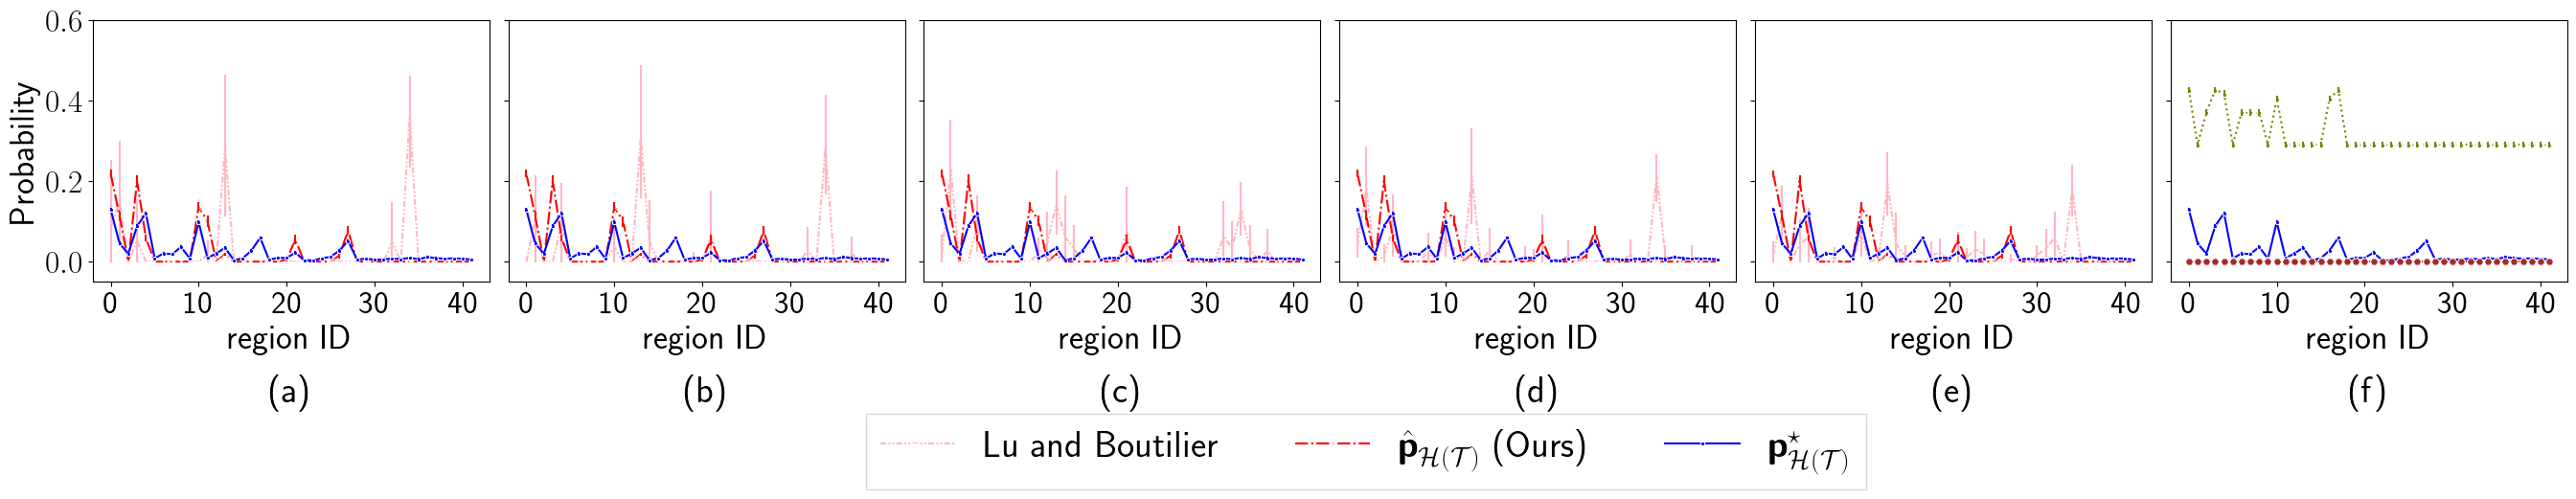

In [5]:
fig, axs = plt.subplots(1, 6, figsize=(27, 4.5), sharey=True)

# Figure 8(a)
for i in range(5):
    sns.lineplot(data=df_zappos[df_zappos.method == f'lu, K={i + 2}'], x='regionID', y='Probability', err_style='bars', ax=axs[i], label="Lu and Boutilier", color='lightpink', marker=0, linestyle=(0, (3, 1, 1, 1, 1, 1)))
    sns.lineplot(data=df_zappos[df_zappos.method == 'least-square-graph'], x='regionID', y='Probability', err_style='bars', ax=axs[i], label=f"{PHAT} (Ours)", color=color['phat'], linestyle=linestyle['phat'], marker=marker['phat'])
    sns.lineplot(data=df_zappos[df_zappos.method == 'ptrue'], x='regionID', y='Probability', err_style='bars', ax=axs[i], label=f"{PSTAR}", color=color['ptrue'], linestyle=linestyle['ptrue'], marker=marker['ptrue'])
    axs[i].set_xticks([0, 10, 20, 30, 40])

# Figure 8(b)
sns.lineplot(data=df_zappos[df_zappos.method == 'ptrue'], x='regionID', y='Probability', err_style='bars', ax=axs[5], label=f"{PSTAR}", color=color['ptrue'], linestyle=linestyle['ptrue'], marker=marker['ptrue'])
sns.lineplot(data=df_zappos_upper[df_zappos_upper.method == 'ptrue'], x='regionID', y='Probability', err_style='bars', ax=axs[5], label=f"upper bound {PSTAR}", color=color['ptrue_upper'], linestyle=linestyle['ptrue_upper'], marker=marker['ptrue_upper'])
sns.lineplot(data=df_zappos_lower[df_zappos_lower.method == 'ptrue'], x='regionID', y='Probability', err_style='bars', ax=axs[5], label=f"lower bound {PSTAR}", color=color['ptrue_lower'], linestyle=linestyle['ptrue_lower'], marker=marker['ptrue_lower'])
axs[5].set_xticks([0, 10, 20, 30, 40])

handles, labels = axs[0].get_legend_handles_labels()
for i, ax in enumerate(axs):
    ax.legend().remove()
    ax.set_ylim(-0.05, 0.6)
    ax.set_xlabel('region ID', fontsize=label_size)
    ax.set_ylabel('Probability', fontsize=label_size)
    ax.tick_params(axis='both', which='major', labelsize=tick_size)
    ax.set_title("(" + f"{chr(97 + i)}" + ")", loc="center", y=0, fontsize=title_size, pad=-70, verticalalignment="top")

fig.legend(handles, labels, loc="outside lower center", bbox_to_anchor=(0.53, -0.19), fancybox=False, shadow=False, ncol=3, fontsize=legend_size)
fig.tight_layout()
fig.savefig(f"fig/zappos_with_lu.pdf", dpi=300, format="pdf", bbox_inches="tight")
fig.show()

/var/folders/0b/gtjn2bqj7hl7mth2hd2ybr700000gn/T/ipykernel_7068/1387577375.py:34: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


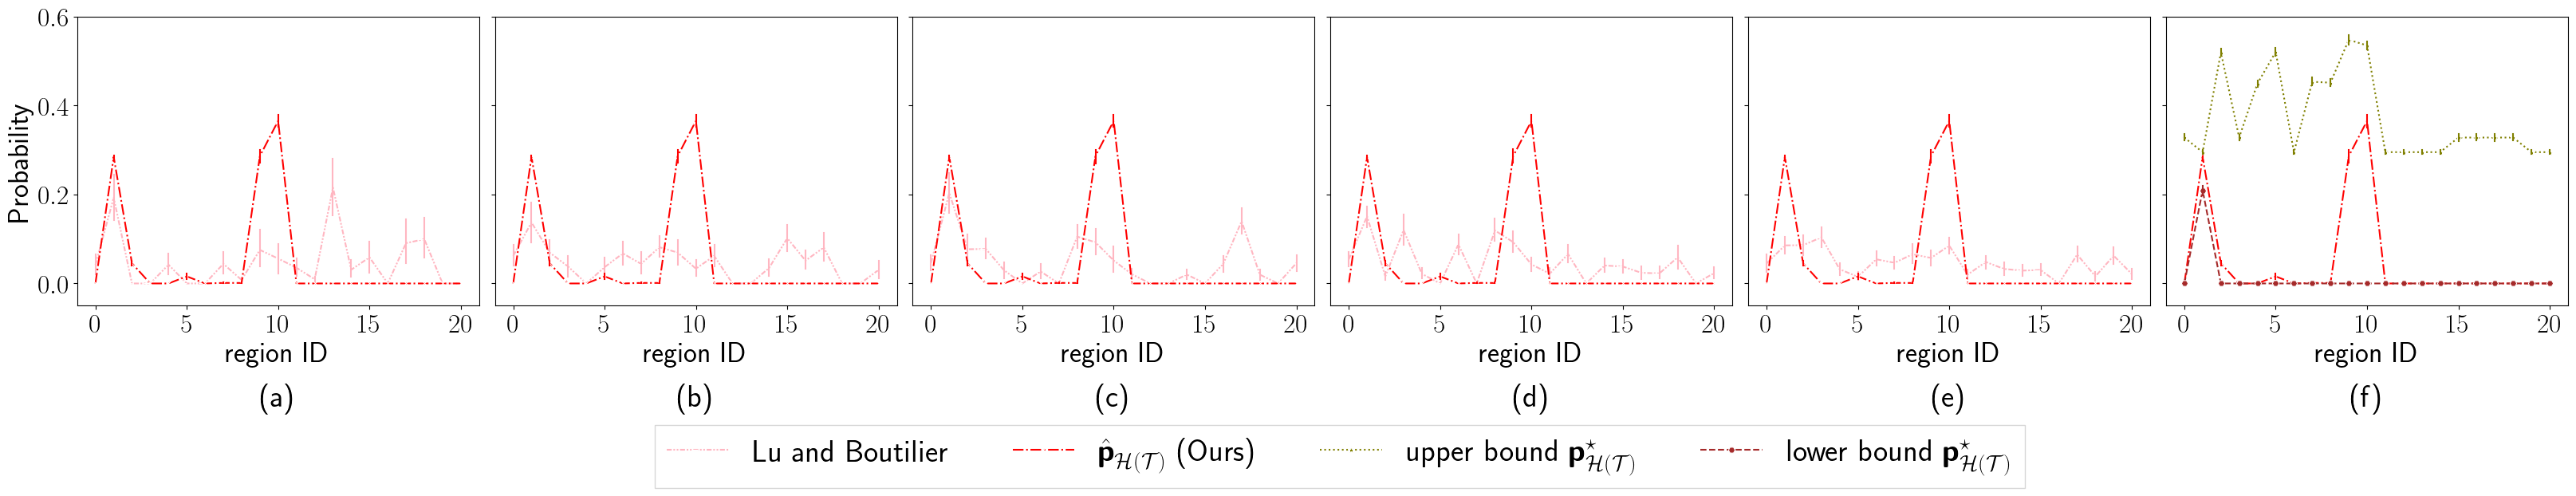

In [6]:
fig, axs = plt.subplots(1, 6, figsize=(32.4, 5.4), sharey=True)

# Figure 8(c)
for i in range(5):
    sns.lineplot(data=p_hats_dceu_lu[p_hats_dceu_lu.K == i + 2], x="region ID", y="probability", err_style="bars", marker=0, linestyle=(0, (3, 1, 1, 1, 1, 1)), ax=axs[i], color='lightpink', label="Lu and Boutilier")
    axs[i].set_xticks([0, 5, 10, 15, 20])
    sns.lineplot(data=p_hats_dceu, x="region ID", y="probability", err_style="bars", label=PHAT + " (Ours)", marker=marker['phat'], linestyle=linestyle['phat'], ax=axs[i], color=color['phat'])
    axs[i].set_xticks([0, 5, 10, 15, 20])

# Figure 8(d)
sns.lineplot(data=p_hats_dceu, x="region ID", y="probability", err_style="bars", label=PHAT + " (Ours)", marker=marker['phat'], linestyle=linestyle['phat'], ax=axs[5], color=color['phat'])
sns.lineplot(p_hats_dceu, x="region ID", y="p_upper", ax=axs[5], err_style="bars", label=f"upper bound {PSTAR}", color=color['ptrue_upper'], linestyle=linestyle['ptrue_upper'], marker=marker['ptrue_upper'])
sns.lineplot(p_hats_dceu, x="region ID", y="p_lower", ax=axs[5], err_style="bars", label=f"lower bound {PSTAR}", color=color['ptrue_lower'], linestyle=linestyle['ptrue_lower'], marker=marker['ptrue_lower'])
axs[5].set_xticks([0, 5, 10, 15, 20])



handles, labels = axs[0].get_legend_handles_labels()
handles_, labels_ = axs[5].get_legend_handles_labels()
handles = handles_ + handles
labels = labels_ + labels
for i, ax in enumerate(axs):
    ax.set_ylim(-0.05, 0.6)
    ax.legend().remove()
    ax.set_xlabel('region ID', fontsize=label_size)
    ax.set_ylabel('Probability', fontsize=label_size)
    ax.tick_params(axis='both', which='major', labelsize=tick_size)
    ax.set_title("(" + f"{chr(97 + i)}" + ")", loc="center", y=0, fontsize=title_size, pad=-70, verticalalignment="top")

idx= [3, 0, 1, 2]
fig.legend([handles[i] for i in idx], [labels[i] for i in idx], loc="outside lower center", bbox_to_anchor=(0.52, -0.18), fancybox=False, shadow=False, ncol=4, fontsize=legend_size)
fig.tight_layout()
fig.savefig(f"fig/dceu_with_lu.pdf", dpi=300, format="pdf", bbox_inches="tight")
fig.show()

/var/folders/0b/gtjn2bqj7hl7mth2hd2ybr700000gn/T/ipykernel_7068/3071548515.py:31: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


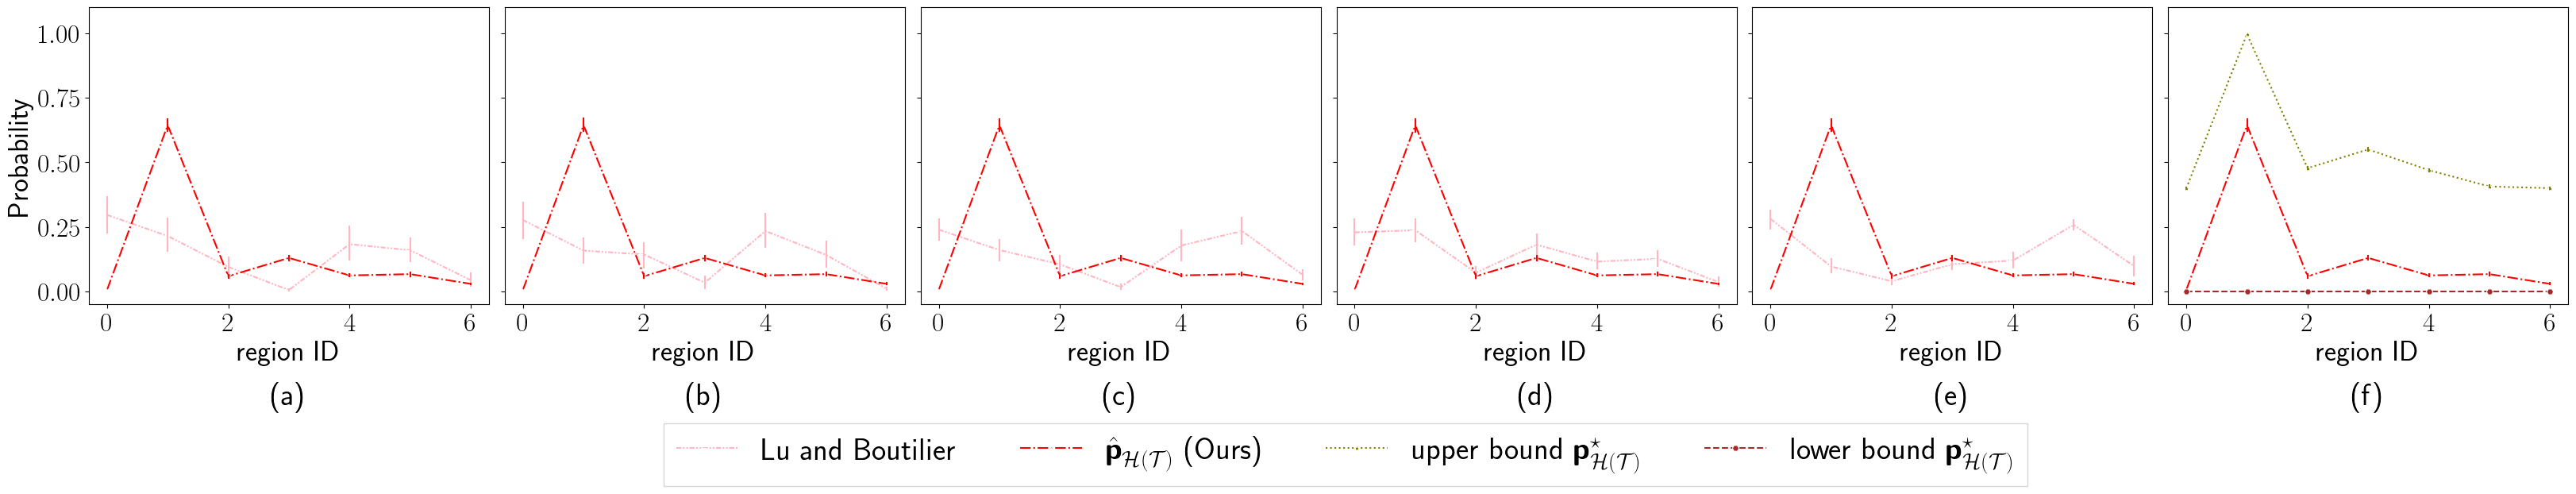

In [7]:
fig, axs = plt.subplots(1, 6, figsize=(32.4, 5.4), sharey=True)

# Figure 8(c)
for i in range(5):
    sns.lineplot(data=p_hats_movies2_lu[p_hats_movies2_lu.K == i + 2], x="region ID", y="probability", err_style="bars", marker=0, linestyle=(0, (3, 1, 1, 1, 1, 1)), ax=axs[i], color='lightpink', label="Lu and Boutilier")
    sns.lineplot(data=p_hats_movies2, x="region ID", y="probability", err_style="bars", label=PHAT + " (Ours)", marker=marker['phat'], linestyle=linestyle['phat'], ax=axs[i], color=color['phat'])

# Figure 8(d)
sns.lineplot(data=p_hats_movies2, x="region ID", y="probability", err_style="bars", label=PHAT + " (Ours)", marker=marker['phat'], linestyle=linestyle['phat'], ax=axs[5], color=color['phat'])
sns.lineplot(p_hats_movies2, x="region ID", y="p_upper", ax=axs[5], err_style="bars", label=f"upper bound {PSTAR}", color=color['ptrue_upper'], linestyle=linestyle['ptrue_upper'], marker=marker['ptrue_upper'])
sns.lineplot(p_hats_movies2, x="region ID", y="p_lower", ax=axs[5], err_style="bars", label=f"lower bound {PSTAR}", color=color['ptrue_lower'], linestyle=linestyle['ptrue_lower'], marker=marker['ptrue_lower'])



handles, labels = axs[0].get_legend_handles_labels()
handles_, labels_ = axs[5].get_legend_handles_labels()
handles = handles_ + handles
labels = labels_ + labels
for i, ax in enumerate(axs):
    ax.set_ylim(-0.05, 1.1)
    ax.legend().remove()
    ax.set_xlabel('region ID', fontsize=label_size)
    ax.set_ylabel('Probability', fontsize=label_size)
    ax.tick_params(axis='both', which='major', labelsize=tick_size)
    ax.set_title("(" + f"{chr(97 + i)}" + ")", loc="center", y=0, fontsize=title_size, pad=-70, verticalalignment="top")

idx= [3, 0, 1, 2]
fig.legend([handles[i] for i in idx], [labels[i] for i in idx], loc="outside lower center", bbox_to_anchor=(0.52, -0.18), fancybox=False, shadow=False, ncol=4, fontsize=legend_size)
fig.tight_layout()
fig.savefig(f"fig/movies2_with_lu.pdf", dpi=300, format="pdf", bbox_inches="tight")
fig.show()